# Part 1: Data preprocessing

Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

## Importing the libraries and the dataset

In [1]:
import numpy as np                 # Importing the numpy library for numerical operations
import pandas as pd                # Importing the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt    # Importing the matplotlib library for data visualization
import seaborn as sns              # Importing the seaborn library for advanced data visualization


In [2]:
! pip install -q kaggle    # Installing the Kaggle package using pip

In [3]:
! mkdir ~/.kaggle                          # Creating a directory named ".kaggle" in the user's home directory
! cp kaggle.json ~/.kaggle/                # Copying the file "kaggle.json" to the ".kaggle" directory
! chmod 600 /root/.kaggle/kaggle.json      # Setting the permissions of the "kaggle.json" file to read and write only for the owner
! kaggle datasets download -d mlg-ulb/creditcardfraud   # Downloading the dataset with the specified Kaggle dataset ID

 96% 63.0M/66.0M [00:00<00:00, 140MB/s]
100% 66.0M/66.0M [00:00<00:00, 126MB/s]


In [4]:
! unzip -q /content/creditcardfraud.zip    # Unzipping the file "creditcardfraud.zip" in the "/content" directory

## Data Exploration

In [5]:
# Read the CSV file
dataset = pd.read_csv("/content/creditcard.csv")

# Display the first few rows of the dataset
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Display the shape of the dataset
# The shape attribute returns a tuple representing the dimensions of the dataset (rows, columns)
print("Dataset shape:", dataset.shape)

Dataset shape: (284807, 31)


In [7]:
# Display the columns of the dataset
# The columns attribute returns a pandas Index object representing the column names
column_names = dataset.columns
print("Column names:", column_names)

Column names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
# Display information about the dataset
# The info() method provides a summary of the dataset including column names, data types, and non-null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Generate descriptive statistics of the dataset
# The describe() method provides summary statistics of the numerical columns in the dataset
# This includes count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Dealing with missing values

In [10]:
# Check for missing values in the dataset
# The isnull() function returns a DataFrame of boolean values indicating if each element is null or not
# The values attribute retrieves the underlying NumPy array from the DataFrame
# The any() method checks if there are any True values in the array, indicating the presence of missing values
missing_values = dataset.isnull().values.any()

if missing_values:
    print("The dataset contains missing values.")
else:
    print("The dataset does not contain missing values.")

The dataset does not contain missing values.


In [11]:
# Calculate the total number of missing values in the dataset
# The sum() method calculates the sum of all True values in the array, which represents the count of missing values
missing_values_count = dataset.isnull().values.sum()

print("Total missing values in the dataset:", missing_values_count)

Total missing values in the dataset: 0


## Encoding categorical data

In [12]:
# Select columns of object data type from the dataset
# The select_dtypes(include="object") function selects columns with object (string) data type
# The columns attribute retrieves the column names as a pandas Index object
object_columns = dataset.select_dtypes(include="object").columns

print("Object columns in the dataset:")
print(object_columns)

Object columns in the dataset:
Index([], dtype='object')


In [13]:
# Calculate the number of columns with object data type in the dataset
# The select_dtypes(include="object") function selects columns with object (string) data type
# The columns attribute retrieves the column names as a pandas Index object
# The len() function calculates the number of columns in the Index object
object_columns_count = len(dataset.select_dtypes(include="object").columns)

print("Number of object columns in the dataset:", object_columns_count)

Number of object columns in the dataset: 0


## Countplot

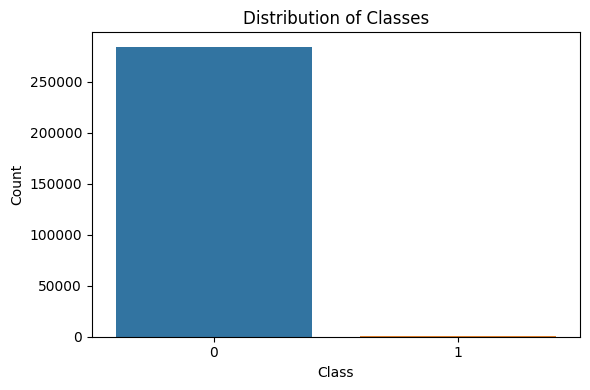

In [14]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create the countplot
sns.countplot(data=dataset, x='Class')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
# non fraud transactions
(dataset.Class == 0).sum()

284315

In [16]:
# fraud transactions
(dataset.Class == 1).sum()

492

## Correlation matrix and heatmap

In [17]:
# Create a new dataset by dropping the "Class" column
# The drop(columns="Class") function drops the specified column from the dataset
# The result is stored in the new dataset, dataset_2
dataset_2 = dataset.drop(columns="Class")

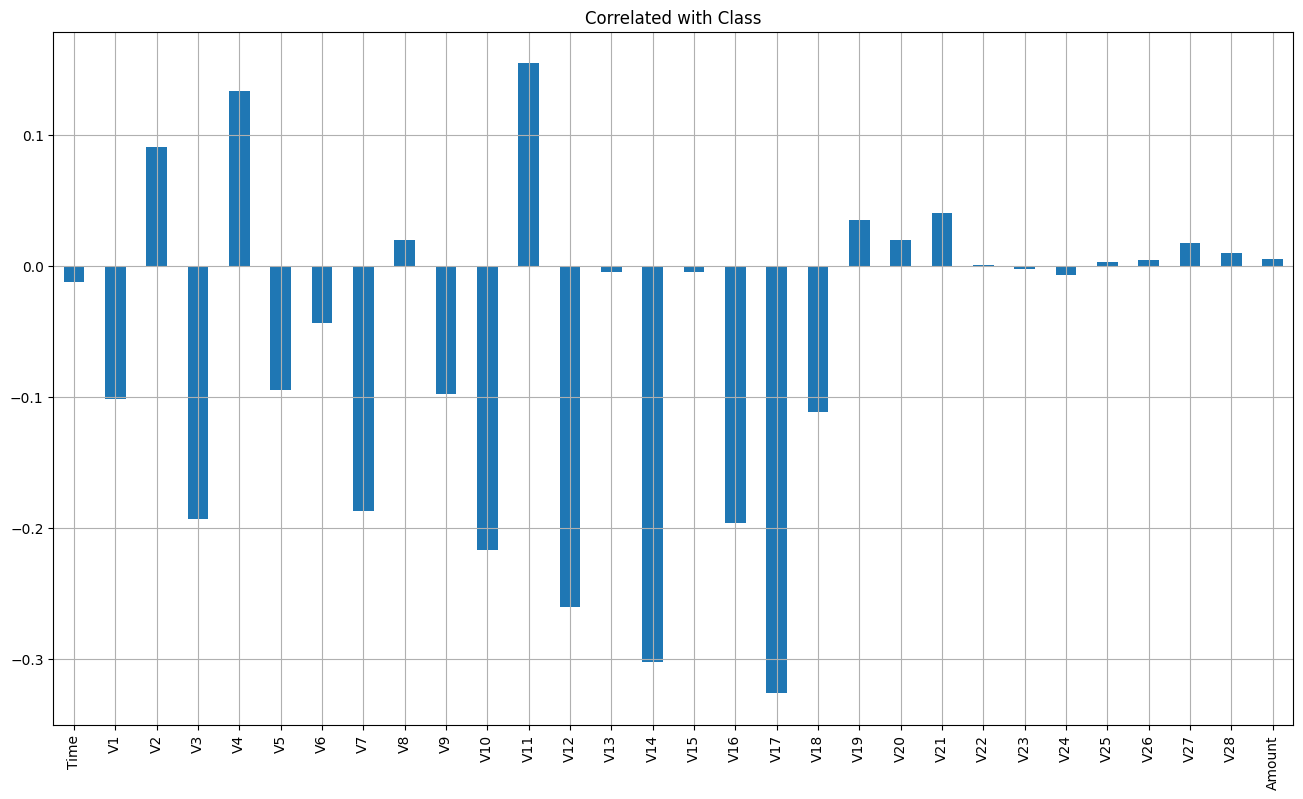

In [18]:
# Create a new dataset by dropping the "Class" column
dataset_2 = dataset.drop(columns="Class")

# Calculate the correlation between dataset_2 columns and the "Class" column
correlation = dataset_2.corrwith(dataset['Class'])

# Plot the correlation values as a bar chart
# figsize=(16, 9) sets the size of the figure
# title='correlated with class' sets the title of the plot
# grid=True displays grid lines in the plot
correlation.plot.bar(figsize=(16, 9), title='Correlated with Class', grid=True)

# Display the plot
plt.show()

In [19]:
# Calculate the correlation matrix of the dataset
# The corr() function calculates the pairwise correlation between columns in the dataset
# The result is stored in the variable 'corr' as a correlation matrix
corr = dataset.corr()

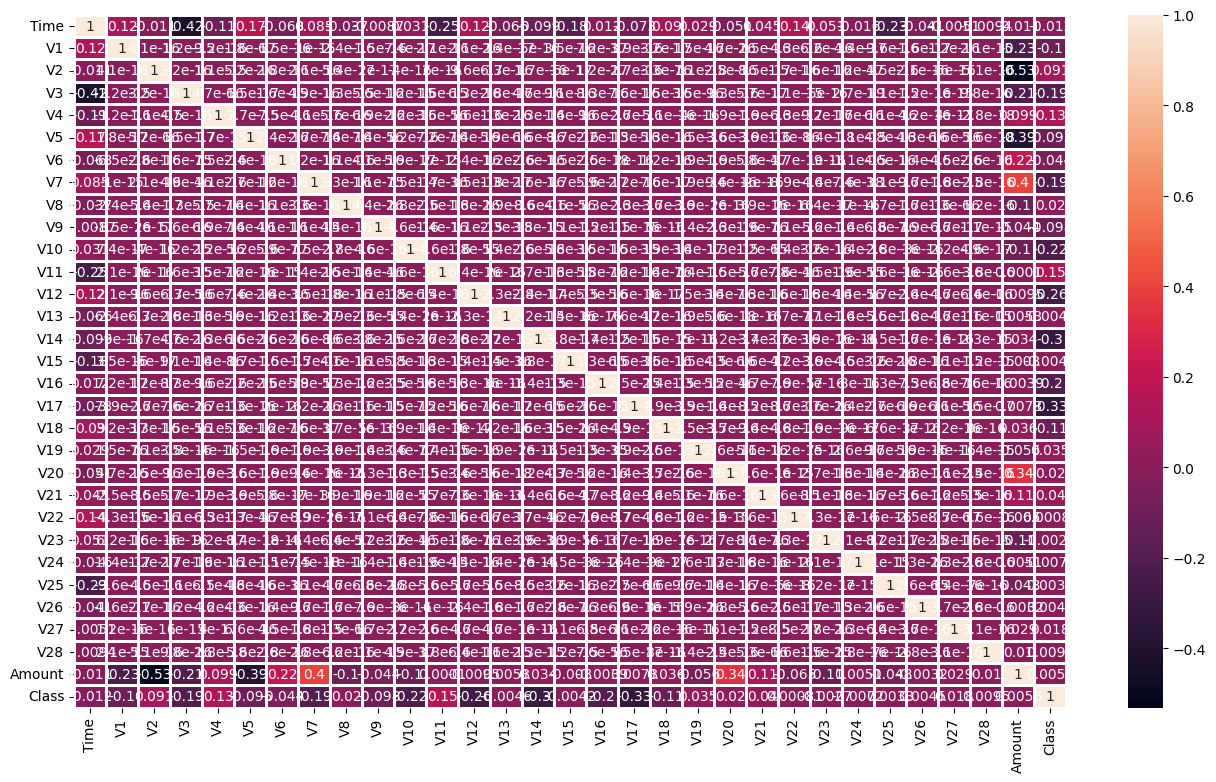

In [20]:
# Calculate the correlation matrix of the dataset
corr = dataset.corr()

# Set the figure size for the heatmap plot
plt.figure(figsize=(16, 9))

# Create a heatmap plot of the correlation matrix
# The heatmap is created using seaborn's heatmap function
# The 'annot=True' parameter displays the correlation values on the heatmap
# The 'linewidths=2' parameter sets the width of the lines separating the cells in the heatmap
ax = sns.heatmap(corr, annot=True, linewidths=2)

# Display the heatmap plot
plt.show()

## Splitting the dataset

In [21]:
x = dataset.drop(columns = 'Class')
y = dataset['Class']

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# The train_test_split() function splits the data into random train and test subsets
# The 'x' and 'y' variables represent the input features and target variable, respectively
# The 'test_size=0.2' parameter specifies that 20% of the data will be used for testing
# The 'random_state=0' parameter sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [23]:
print(x_train.shape)

(227845, 30)


In [24]:
print(x_test.shape)

(56962, 30)


In [25]:
print(y_train.shape)

(227845,)


In [26]:
print(y_test.shape)

(56962,)


## Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
# The StandardScaler class is used to standardize the features by removing the mean and scaling to unit variance
sc = StandardScaler()

# Standardize the training data
# The fit_transform() method computes the mean and standard deviation of the features in the training set
# It then standardizes the training data by subtracting the mean and dividing by the standard deviation
x_train = sc.fit_transform(x_train)

# Standardize the testing data
# The transform() method uses the mean and standard deviation computed from the training set
# It applies the same standardization to the testing data, ensuring consistency with the training data
x_test = sc.transform(x_test)


In [28]:
print(x_train)

[[-0.87750986 -0.57177938  0.62828369 ...  0.57377804 -0.2196612
  -0.30511629]
 [-1.15308534  0.62679248 -0.08362249 ... -0.17091545  0.00631402
  -0.25423683]
 [ 1.26383162  0.98361214 -0.1198731  ...  0.13283995 -0.10128286
  -0.32950779]
 ...
 [-0.38349503  0.77210803 -0.57499928 ... -0.00209668  0.01184758
  -0.21662151]
 [ 0.05096267  0.91851362 -1.02985151 ... -0.08231776 -0.10081197
   0.33333622]
 [-0.41989457 -0.30294167  0.45385207 ...  0.21715744  0.36857129
  -0.29286006]]


In [29]:
print(x_test)

[[ 0.65238668 -0.16686457  0.64154241 ...  0.27172397  0.50280513
  -0.19606009]
 [ 1.31372573 -0.18035885  0.56586861 ...  0.19283776  0.54777109
  -0.34934352]
 [ 1.21343225 -0.82732765 -1.45828848 ...  0.7146577   1.36386022
   0.02971246]
 ...
 [ 0.89086789  0.57407801 -1.38701874 ... -0.5986488  -0.02294377
   1.99397392]
 [ 1.39073528  1.05455377  0.17341371 ... -0.2555804  -0.19207626
  -0.34543281]
 [ 1.22637946  1.20109412 -0.80279701 ...  0.01953937 -0.16055905
  -0.2968514 ]]


# Part 2: Building the model

## 1) Logistic regression

In [30]:
# Importing the LogisticRegression class from the linear_model module in the sklearn library
from sklearn.linear_model import LogisticRegression

# Creating an instance of the LogisticRegression classifier
classifier_LR = LogisticRegression()

# Training the classifier using the training data
# x_train is the input features or independent variables
# y_train is the target variable or dependent variable
classifier_LR.fit(x_train, y_train)


LogisticRegression()

In [31]:
# Generating predictions using the trained Logistic Regression classifier on the test data
# x_test represents the input features of the test data
y_pred = classifier_LR.predict(x_test)

In [32]:
# Importing the required metrics from the sklearn library
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
acc_LR = accuracy_score(y_test, y_pred)

# Calculating the F1 score by comparing the true labels (y_test) with the predicted labels (y_pred)
f1_LR = f1_score(y_test, y_pred)

# Calculating the precision score by comparing the true labels (y_test) with the predicted labels (y_pred)
pre_LR = precision_score(y_test, y_pred)

# Calculating the recall score by comparing the true labels (y_test) with the predicted labels (y_pred)
rec_LR = recall_score(y_test, y_pred)

# Creating a pandas DataFrame to store the evaluation results
# The DataFrame has one row containing the model name and the corresponding scores
results = pd.DataFrame([['Logistic Regression', acc_LR, f1_LR, pre_LR, rec_LR]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Printing the evaluation results
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.999192,0.735632,0.876712,0.999192


Confusion Matrix

In [33]:
# Calculating the confusion matrix using the true labels (y_test) and the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print(cm)

[[56852     9]
 [   37    64]]


## 2) Random forest

In [35]:
# Importing the RandomForestClassifier class from the ensemble module in the sklearn library
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the RandomForestClassifier with a random_state of 0
# The random_state parameter ensures reproducibility of the randomization process
classifier_Rf = RandomForestClassifier(random_state=0)

# Training the RandomForestClassifier using the training data
# x_train is the input features or independent variables
# y_train is the target variable or dependent variable
classifier_Rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
# Generating predictions using the trained RandomForestClassifier on the test data
# x_test represents the input features of the test data
y_pred = classifier_Rf.predict(x_test)

In [37]:
# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
acc_RF = accuracy_score(y_test, y_pred)

# Calculating the F1 score by comparing the true labels (y_test) with the predicted labels (y_pred)
f1_RF = f1_score(y_test, y_pred)

# Calculating the precision score by comparing the true labels (y_test) with the predicted labels (y_pred)
pre_RF = precision_score(y_test, y_pred)

# Calculating the recall score by comparing the true labels (y_test) with the predicted labels (y_pred)
rec_RF = recall_score(y_test, y_pred)

# Creating a new DataFrame to store the evaluation results for the Random Forest model
# The DataFrame has one row containing the model name and the corresponding scores
results_RF = pd.DataFrame([['Random Forest', acc_RF, f1_RF, pre_RF, rec_RF]],
                          columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Appending the Random Forest results to the existing results DataFrame
results = results.append(results_RF, ignore_index=True)

# Printing the updated results DataFrame
results

<ipython-input-37-4197e7fbcc89>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_RF, ignore_index = True)


,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.999192,0.735632,0.876712,0.999192
1,Random Forest,0.999491,0.844920,0.918605,0.999491


Confusion Matrix

In [38]:
# Calculating the confusion matrix using the true labels (y_test) and the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print(cm)

[[56854     7]
 [   22    79]]


## 3) XGBoost classifier

In [40]:
# Importing the XGBClassifier class from the xgboost library
from xgboost import XGBClassifier

# Creating an instance of the XGBClassifier with a random_state of 0
# The random_state parameter ensures reproducibility of the randomization process
classifier_xgb = XGBClassifier(random_state=0)

# Training the XGBClassifier using the training data
# x_train is the input features or independent variables
# y_train is the target variable or dependent variable
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [41]:
# Generating predictions using the trained XGBClassifier on the test data
# x_test represents the input features of the test data
y_pred = classifier_xgb.predict(x_test)

In [42]:
# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
acc_xgb = accuracy_score(y_test, y_pred)

# Calculating the precision score by comparing the true labels (y_test) with the predicted labels (y_pred)
prec_xgb = precision_score(y_test, y_pred)

# Calculating the recall score by comparing the true labels (y_test) with the predicted labels (y_pred)
rec_xgb = recall_score(y_test, y_pred)

# Calculating the F1 score by comparing the true labels (y_test) with the predicted labels (y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Creating a new DataFrame to store the evaluation results for the XGBoost model
# The DataFrame has one row containing the model name and the corresponding scores
results_xgb = pd.DataFrame([['XGBoost', acc_xgb, prec_xgb, rec_xgb, f1_xgb]],
                             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the XGBoost results to the existing results DataFrame
results = results.append(results_xgb, ignore_index=True)

# Printing the updated results DataFrame
results

<ipython-input-42-f4df5df75139>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_xgb, ignore_index=True)


,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.999192,0.735632,0.876712,0.999192
1,Random Forest,0.999491,0.844920,0.918605,0.999491
2,XGBoost,0.999614,0.884211,0.943820,0.831683


Confusion Matrix

In [43]:
# Calculating the confusion matrix using the true labels (y_test) and the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print(cm)

[[56856     5]
 [   17    84]]


## Determining the max accuracy

In [45]:
# Assuming you have the accuracy scores stored in a list called accuracy_scores

# Creating a list of model names
model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy_scores = [acc_LR, acc_RF, acc_xgb]

# Creating a dictionary to map model names to accuracy scores
model_accuracy_dict = dict(zip(model_names, accuracy_scores))

# Finding the maximum accuracy score using the max() function and retrieving the corresponding model name
max_accuracy_model = max(model_accuracy_dict, key=model_accuracy_dict.get)
max_accuracy = model_accuracy_dict[max_accuracy_model]

# Printing the model name and maximum accuracy
print("Model with Maximum Accuracy: {} - {:.2f}%".format(max_accuracy_model, max_accuracy * 100))


Model with Maximum Accuracy: XGBoost - 99.96%


# Part 3: Final model (XGBoost)

In [46]:
# Importing the XGBClassifier class from the xgboost library
from xgboost import XGBClassifier

# Creating an instance of the XGBClassifier with a random_state of 0
# The random_state parameter ensures reproducibility of the randomization process
classifier = XGBClassifier(random_state=0)

# Training the XGBClassifier using the training data
# x_train is the input features or independent variables
# y_train is the target variable or dependent variable
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [47]:
# Generating predictions using the trained XGBClassifier on the test data
# x_test represents the input features of the test data
y_pred = classifier.predict(x_test)

In [48]:
# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
acc_xgb = accuracy_score(y_test, y_pred)

# Calculating the precision score by comparing the true labels (y_test) with the predicted labels (y_pred)
prec_xgb = precision_score(y_test, y_pred)

# Calculating the recall score by comparing the true labels (y_test) with the predicted labels (y_pred)
rec_xgb = recall_score(y_test, y_pred)

# Calculating the F1 score by comparing the true labels (y_test) with the predicted labels (y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Creating a new DataFrame to store the evaluation results for the XGBoost model
# The DataFrame has one row containing the model name and the corresponding scores
results = pd.DataFrame([['XGBoost', acc_xgb, prec_xgb, rec_xgb, f1_xgb]],
                             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Printing the updated results DataFrame
results

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.999614,0.94382,0.831683,0.884211


In [49]:
# Calculating the confusion matrix using the true labels (y_test) and the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print(cm)

[[56856     5]
 [   17    84]]


# Part 4: Predicting a single observation

In [50]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
dataset.shape

(284807, 31)

In [53]:
single_obs = [[0.0, -1.359807,	-0.072781,	2.536347,	1.378155,	-0.338321,	0.462388,	0.239599,	0.098698,	0.363787,	0.090794,	-0.551600,	-0.617801,	-0.991390,	-0.311169,	1.468177,	-0.470401,	0.207971,	0.025791,	0.403993,	0.251412,	-0.018307,	0.277838,	-0.110474,	0.066928,	0.128539,	-0.189115,	0.133558,	-0.021053,	149.62
]]

In [55]:
result = classifier.predict(sc.transform(single_obs))
print(result)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
